# Introduction

In this notebook, we will explore Invistico Airline and their dataset, then make use of that data to build a predictive model that can accurately predict whether or not a passenger will be satisfied with their flight experience.

# Problem Statement

Using self-reported or objective data recorded on passengers, predict the satisfaction that the passenger have with their experience at Invistico Airlines.

The data is for a sample size of 129,880 customers. It includes data points such as class, flight distance, and inflight entertainment to be used to predict whether a customer will be satisfied with their flight experience.

Dataset: https://www.kaggle.com/datasets/yakhyojon/customer-satisfaction-in-airline?resource=download

# Package Imports

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go

# Exploratory Data Analysis

## Dataset Information

**Variable Description**

**Satisfaction:** Passenger satisfaction level.

**Customer Type:** Type of customer.

**Age:** Age of the passenger.

**Type of Travel:** Purpose of the trip.

**Class:** Travel class.

**Flight Distance:** Flight distance in miles.

**Seat Comfort:** Passenger's rating for seat comfort.

**Departure/Arrival Time Convenience:** Passenger's rating for the convenience of departure/arrival times.

**Food and Drink:** Passenger's rating for food and drink quality.

**Gate Location:** Passenger's rating for the gate location.

**Inflight WiFi Service:** Passenger's rating for inflight WiFi service.

**Inflight Entertainment:** Passenger's rating for inflight entertainment.

**Online Support:** Passenger's rating for online customer support.

**Ease of Online Booking:** Passenger's rating for the ease of online booking.

**On-board Service:** Passenger's rating for on-board service.

**Leg Room Service:** Passenger's rating for legroom service.

**Baggage Handling:** Passenger's rating for baggage handling.

**Check-in Service:** Passenger's rating for check-in service.

**Cleanliness:** Passenger's rating for cabin cleanliness.

**Online Boarding:** Passenger's rating for online boarding service.

**Departure Delay in Minutes:** Delay in departure time in minutes.

**Arrival Delay in Minutes:** Delay in arrival time in minutes.

In [3]:
warnings.filterwarnings("ignore", category=UserWarning, module="seaborn")
warnings.filterwarnings("ignore", category=ConvergenceWarning)

In [4]:
data = pd.read_csv('Invistico_Airline.csv')
data.head()

satisfaction   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Loyal Customer   65  Personal Travel       Eco   
1    satisfied  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  Gate location  ...  Online support  Ease of Online booking  \
0               0              2  ...               2                       3   
1               0              3  ...               2                       3   
2               0              3  ...               2                       2   
3               0              3  ...               3                       1   
4               0              3  ...               4                       2   

   On-board service  Leg room service  Baggage handling  Checkin service  \
0                 3                 0                 3                5   
1                 4                 4                 4                2   
2                 3                 3                 4                4   
3                 1                 0                 1                4   
4                 2                 0                 2                4   

   Cleanliness  Online boarding  Departure Delay in Minutes  \
0            3                2                           0   
1            3                2                         310   
2            4                2                           0   
3            1                3                           0   
4            2                5                           0   

   Arrival Delay in Minutes  
0                       0.0  
1                     305.0  
2                       0.0  
3                       0.0  
4                       0.0  

[5 rows x 22 columns]

In [5]:
data.shape

(129880, 22)

In [6]:
data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [7]:
data.describe().T

count         mean          std   min  \
Age                                129880.0    39.427957    15.119360   7.0   
Flight Distance                    129880.0  1981.409055  1027.115606  50.0   
Seat comfort                       129880.0     2.838597     1.392983   0.0   
Departure/Arrival time convenient  129880.0     2.990645     1.527224   0.0   
Food and drink                     129880.0     2.851994     1.443729   0.0   
Gate location                      129880.0     2.990422     1.305970   0.0   
Inflight wifi service              129880.0     3.249130     1.318818   0.0   
Inflight entertainment             129880.0     3.383477     1.346059   0.0   
Online support                     129880.0     3.519703     1.306511   0.0   
Ease of Online booking             129880.0     3.472105     1.305560   0.0   
On-board service                   129880.0     3.465075     1.270836   0.0   
Leg room service                   129880.0     3.485902     1.292226   0.0   
Baggage handling                   129880.0     3.695673     1.156483   1.0   
Checkin service                    129880.0     3.340807     1.260582   0.0   
Cleanliness                        129880.0     3.705759     1.151774   0.0   
Online boarding                    129880.0     3.352587     1.298715   0.0   
Departure Delay in Minutes         129880.0    14.713713    38.071126   0.0   
Arrival Delay in Minutes           129487.0    15.091129    38.465650   0.0   

                                      25%     50%     75%     max  
Age                                  27.0    40.0    51.0    85.0  
Flight Distance                    1359.0  1925.0  2544.0  6951.0  
Seat comfort                          2.0     3.0     4.0     5.0  
Departure/Arrival time convenient     2.0     3.0     4.0     5.0  
Food and drink                        2.0     3.0     4.0     5.0  
Gate location                         2.0     3.0     4.0     5.0  
Inflight wifi service                 2.0     3.0     4.0     5.0  
Inflight entertainment                2.0     4.0     4.0     5.0  
Online support                        3.0     4.0     5.0     5.0  
Ease of Online booking                2.0     4.0     5.0     5.0  
On-board service                      3.0     4.0     4.0     5.0  
Leg room service                      2.0     4.0     5.0     5.0  
Baggage handling                      3.0     4.0     5.0     5.0  
Checkin service                       3.0     3.0     4.0     5.0  
Cleanliness                           3.0     4.0     5.0     5.0  
Online boarding                       2.0     4.0     4.0     5.0  
Departure Delay in Minutes            0.0     0.0    12.0  1592.0  
Arrival Delay in Minutes              0.0     0.0    13.0  1584.0

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 22 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   satisfaction                       129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Seat comfort                       129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Food and drink                     129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Inflight wifi service              129880 non-null  int64  
 11  Inflight entertainment             1298

At first glance, there seems to only be 4 categorical variables. The other variables seem to be numerical variables. There are also some null entries in the Arrival Delay column, which will be dealt with later.

In [9]:
data.nunique()

satisfaction                            2
Customer Type                           2
Age                                    75
Type of Travel                          2
Class                                   3
Flight Distance                      5398
Seat comfort                            6
Departure/Arrival time convenient       6
Food and drink                          6
Gate location                           6
Inflight wifi service                   6
Inflight entertainment                  6
Online support                          6
Ease of Online booking                  6
On-board service                        6
Leg room service                        6
Baggage handling                        5
Checkin service                         6
Cleanliness                             6
Online boarding                         6
Departure Delay in Minutes            466
Arrival Delay in Minutes              472
dtype: int64

In [10]:
data.isnull().sum().sort_values(ascending=False)

Arrival Delay in Minutes             393
Customer Type                          0
Departure Delay in Minutes             0
Online boarding                        0
Cleanliness                            0
Checkin service                        0
Baggage handling                       0
Leg room service                       0
On-board service                       0
Ease of Online booking                 0
Online support                         0
satisfaction                           0
Inflight wifi service                  0
Gate location                          0
Food and drink                         0
Departure/Arrival time convenient      0
Seat comfort                           0
Flight Distance                        0
Class                                  0
Type of Travel                         0
Age                                    0
Inflight entertainment                 0
dtype: int64

In [11]:
for column in data.columns:
    print(data[column].value_counts())
    print()

satisfaction
satisfied       71087
dissatisfied    58793
Name: count, dtype: int64

Customer Type
Loyal Customer       106100
disloyal Customer     23780
Name: count, dtype: int64

Age
39    3692
25    3511
40    3209
44    3104
41    3089
      ... 
74      61
76      60
79      52
78      44
85      25
Name: count, Length: 75, dtype: int64

Type of Travel
Business travel    89693
Personal Travel    40187
Name: count, dtype: int64

Class
Business    62160
Eco         58309
Eco Plus     9411
Name: count, dtype: int64

Flight Distance
1963    92
1812    88
1639    87
1981    86
1789    86
        ..
4222     1
5049     1
5378     1
5613     1
4260     1
Name: count, Length: 5398, dtype: int64

Seat comfort
3    29183
2    28726
4    28398
1    20949
5    17827
0     4797
Name: count, dtype: int64

Departure/Arrival time convenient
4    29593
5    26817
3    23184
2    22794
1    20828
0     6664
Name: count, dtype: int64

Food and drink
3    28150
4    27216
2    27146
1    21076
5    2

By looking at the unique values in each of the columns, we can determine that only satisfaction, customer type, class, type of travel need to be treated as categorical variables. The other columns are indeed numerical variables, but they differ. Some categories are discrete numerical variables, ratings from 0-5, and the others are continuous numerical variables. We will make specific lists to split up these features depending on if they are categorical, continuous numerical, or discrete numerical.

In [12]:
categorical_columns = data.select_dtypes(include='object').columns
numerical_columns = ['Age', 'Flight Distance','Departure Delay in Minutes', 'Arrival Delay in Minutes']
binary_columns = ['Seat comfort',
        'Departure/Arrival time convenient', 'Food and drink', 'Gate location',
        'Inflight wifi service', 'Inflight entertainment', 'Online support',
        'Ease of Online booking', 'On-board service', 'Leg room service',
        'Baggage handling', 'Checkin service', 'Cleanliness', 'Online boarding',]
numerical_columns , categorical_columns, binary_columns

(['Age',
  'Flight Distance',
  'Departure Delay in Minutes',
  'Arrival Delay in Minutes'],
 Index(['satisfaction', 'Customer Type', 'Type of Travel', 'Class'], dtype='object'),
 ['Seat comfort',
  'Departure/Arrival time convenient',
  'Food and drink',
  'Gate location',
  'Inflight wifi service',
  'Inflight entertainment',
  'Online support',
  'Ease of Online booking',
  'On-board service',
  'Leg room service',
  'Baggage handling',
  'Checkin service',
  'Cleanliness',
  'Online boarding'])

## Data Cleaning

The data will be cleaned by transforming extremely distributed features, removing null values, and removing outliers as these anomalies would affect the performance of the machine learning model.

In [13]:
data.isnull().sum()

satisfaction                           0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Seat comfort                           0
Departure/Arrival time convenient      0
Food and drink                         0
Gate location                          0
Inflight wifi service                  0
Inflight entertainment                 0
Online support                         0
Ease of Online booking                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Cleanliness                            0
Online boarding                        0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
dtype: int64

The dataset cannot have null values. Because there are only a few rows with null values, we will handle this issue by simply dropping the rows.

In [14]:
data = data.dropna()

In [15]:
data.isnull().sum()

satisfaction                         0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Seat comfort                         0
Departure/Arrival time convenient    0
Food and drink                       0
Gate location                        0
Inflight wifi service                0
Inflight entertainment               0
Online support                       0
Ease of Online booking               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Cleanliness                          0
Online boarding                      0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
dtype: int64

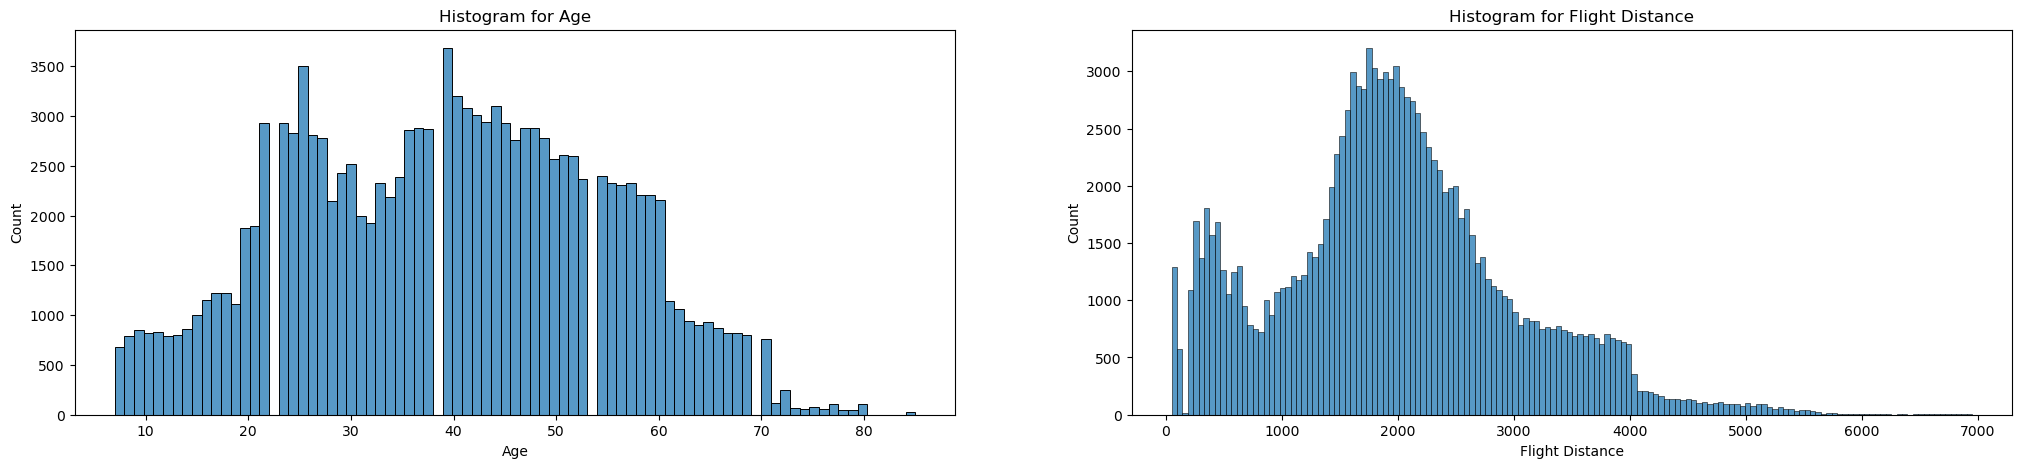

In [16]:
fig, ax = plt.subplots(nrows=1, ncols=len(numerical_columns[:2]), figsize=(25, 5))

for i, column_name in enumerate(numerical_columns[:2]):
    sns.histplot(data, x=column_name, kde=False, ax=ax[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title(f'Histogram for {column_name}')

These graphs show that age is roughly normally distributed. Flight distance appears to be slightly skewed right and most of the data is clustered around 2000 miles.

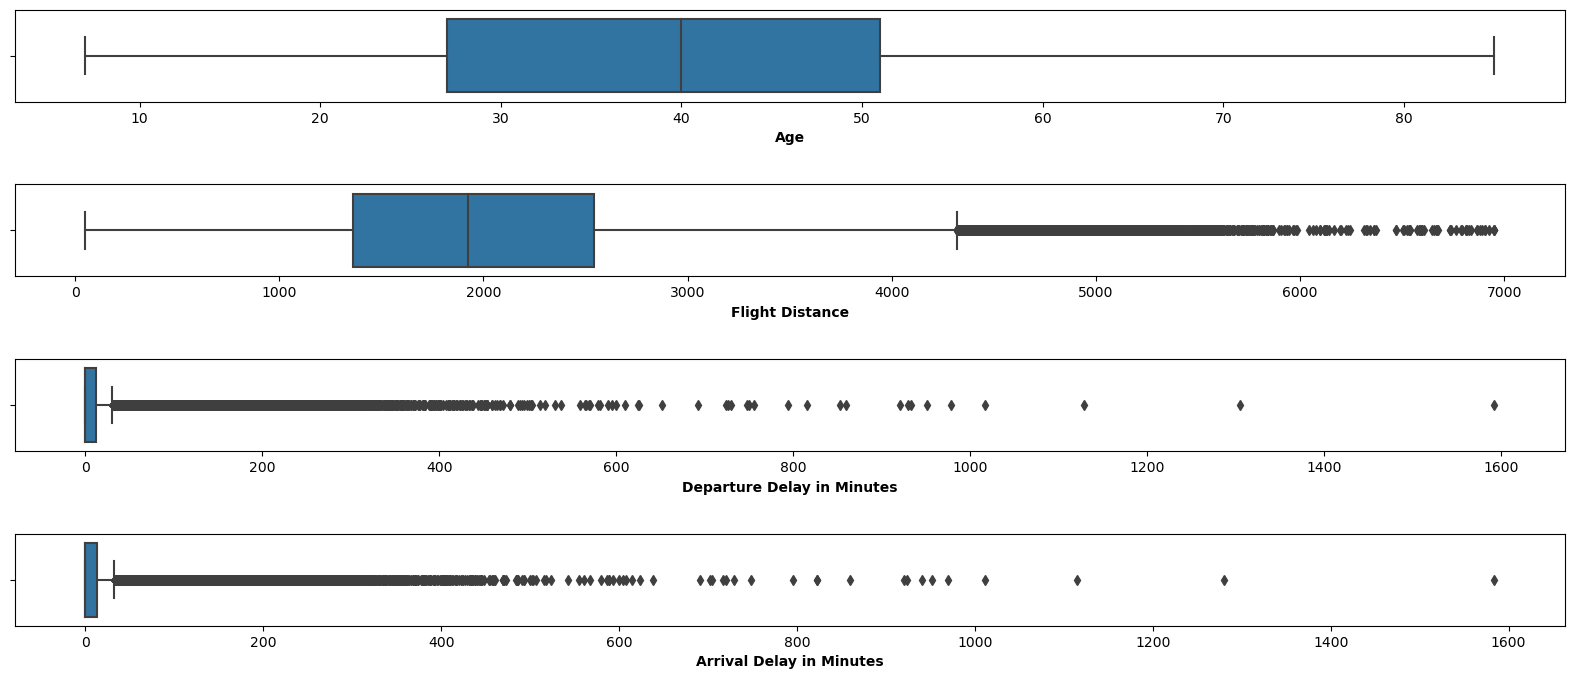

In [17]:
fig, ax = plt.subplots(nrows=4, ncols=1,figsize = (20,8))

for i, column_name in enumerate(numerical_columns):
    sns.boxplot(data, x=column_name, ax=ax[i],orient='h')
    ax[i].set_xlabel(column_name,fontweight='bold')
    
plt.subplots_adjust(hspace=.9)

Looking at these boxplots, we can see that age does not have any outliers. However, the other numerical featuers have many outliers. These outliers will be handled shortly. The boxplots also show that arrival and departure delay seem similarly distributed. They both are skewed right, have many outliers, and most of their data is clustered around 0 minutes.

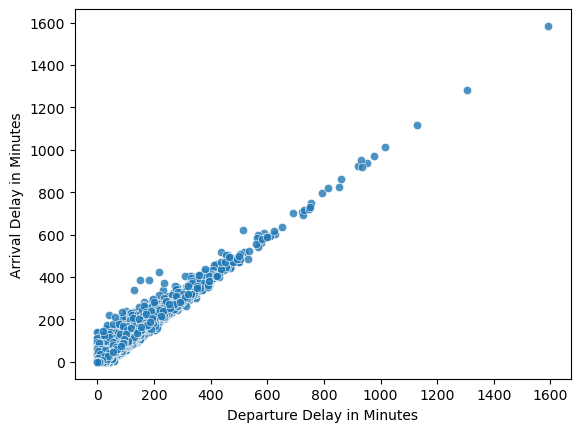

In [18]:
sns.scatterplot(data,x='Departure Delay in Minutes',y='Arrival Delay in Minutes',alpha=.8);

**Note:**

Examining the relationship between departure delay and arrival delay via scatterplot illustrates a fairly linear relationship between the two delays. Once more, the plot shows that most of the delays are concentrated around 0 minutes.

Because the delays were extremely skewed right and the values were fairly extreme, a transformation has to be applied to these features in order for the machine learning models to better understand the data. To transform the data, a log approach fits due to the right skew.

Flight minutes will not be transformed due to its roughly normal distribution.

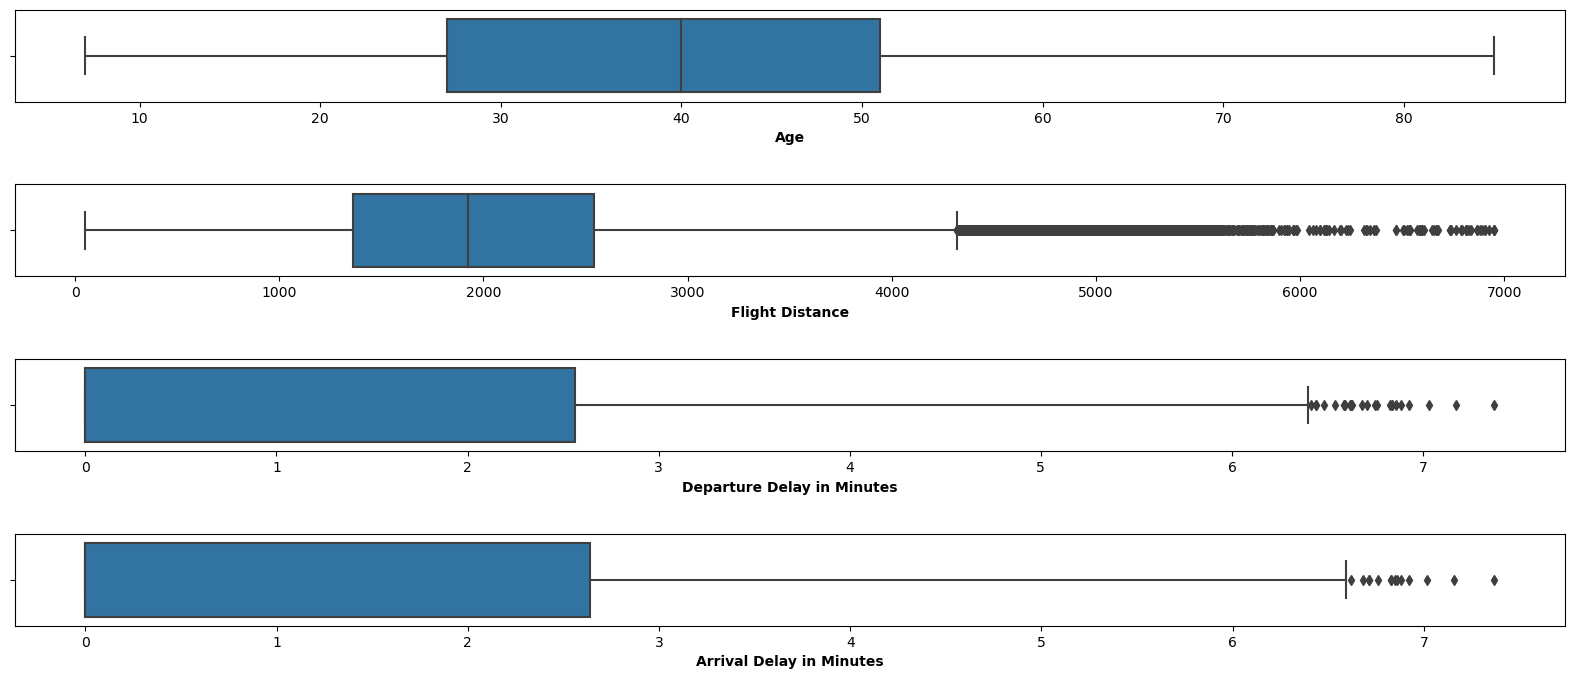

In [19]:
data1 = data.copy()
data1[numerical_columns[2:]] = np.log1p(data1[numerical_columns[2:]])

fig, ax = plt.subplots(nrows=4, ncols=1,figsize = (20,8))

for i, column_name in enumerate(numerical_columns):
    sns.boxplot(data1, x=column_name, ax=ax[i],orient='h')
    ax[i].set_xlabel(column_name,fontweight='bold')
    
plt.subplots_adjust(hspace=.9)

Logging the delay features drastically reduces the amount of outliers and allows for a better visual of the distribution of delays.

## Outlier Removal

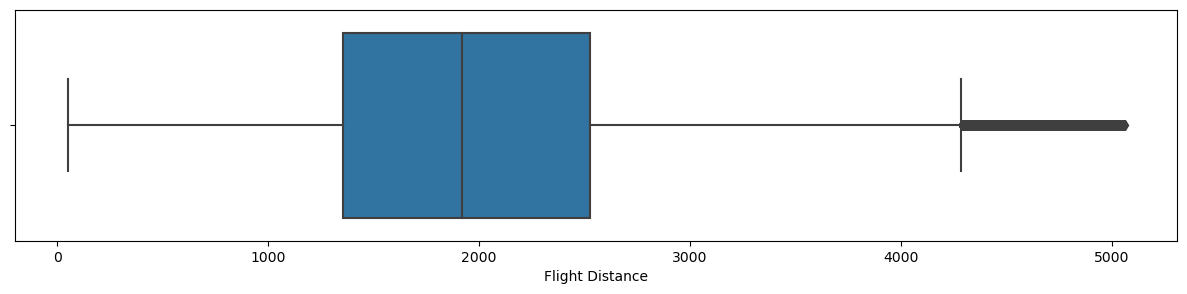

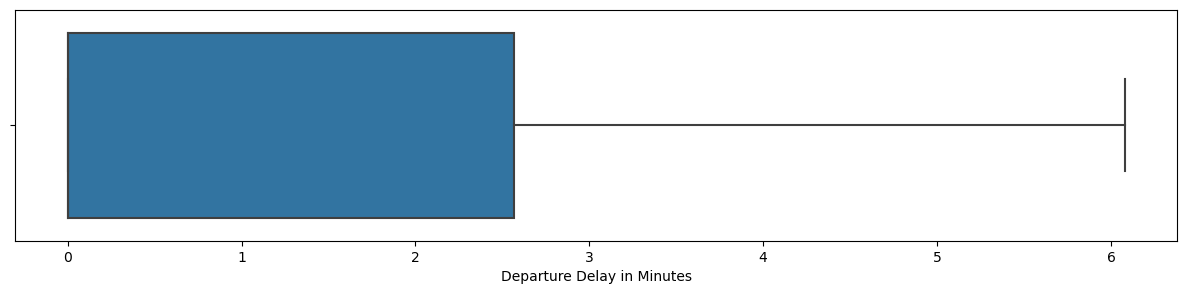

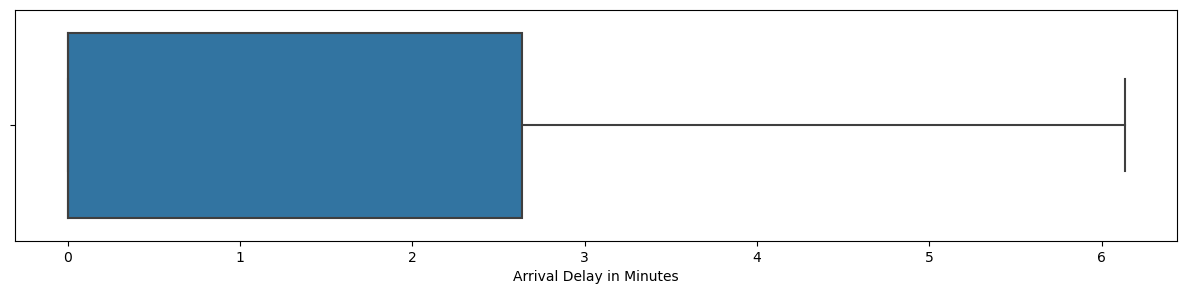

In [20]:
for col in numerical_columns[1:]:

    # Calculate Z-scores
    z_scores = stats.zscore(data1[col])

    # Define a Z-score threshold (e.g., 3)
    z_threshold = 3

    # Identify outliers
    outliers = abs(z_scores) > z_threshold

    # Remove outliers
    data2 = data1[~outliers]

    # Create a boxplot without outliers
    plt.figure(figsize=(15,3))
    sns.boxplot(x=data2[col],orient='h')
    plt.show()

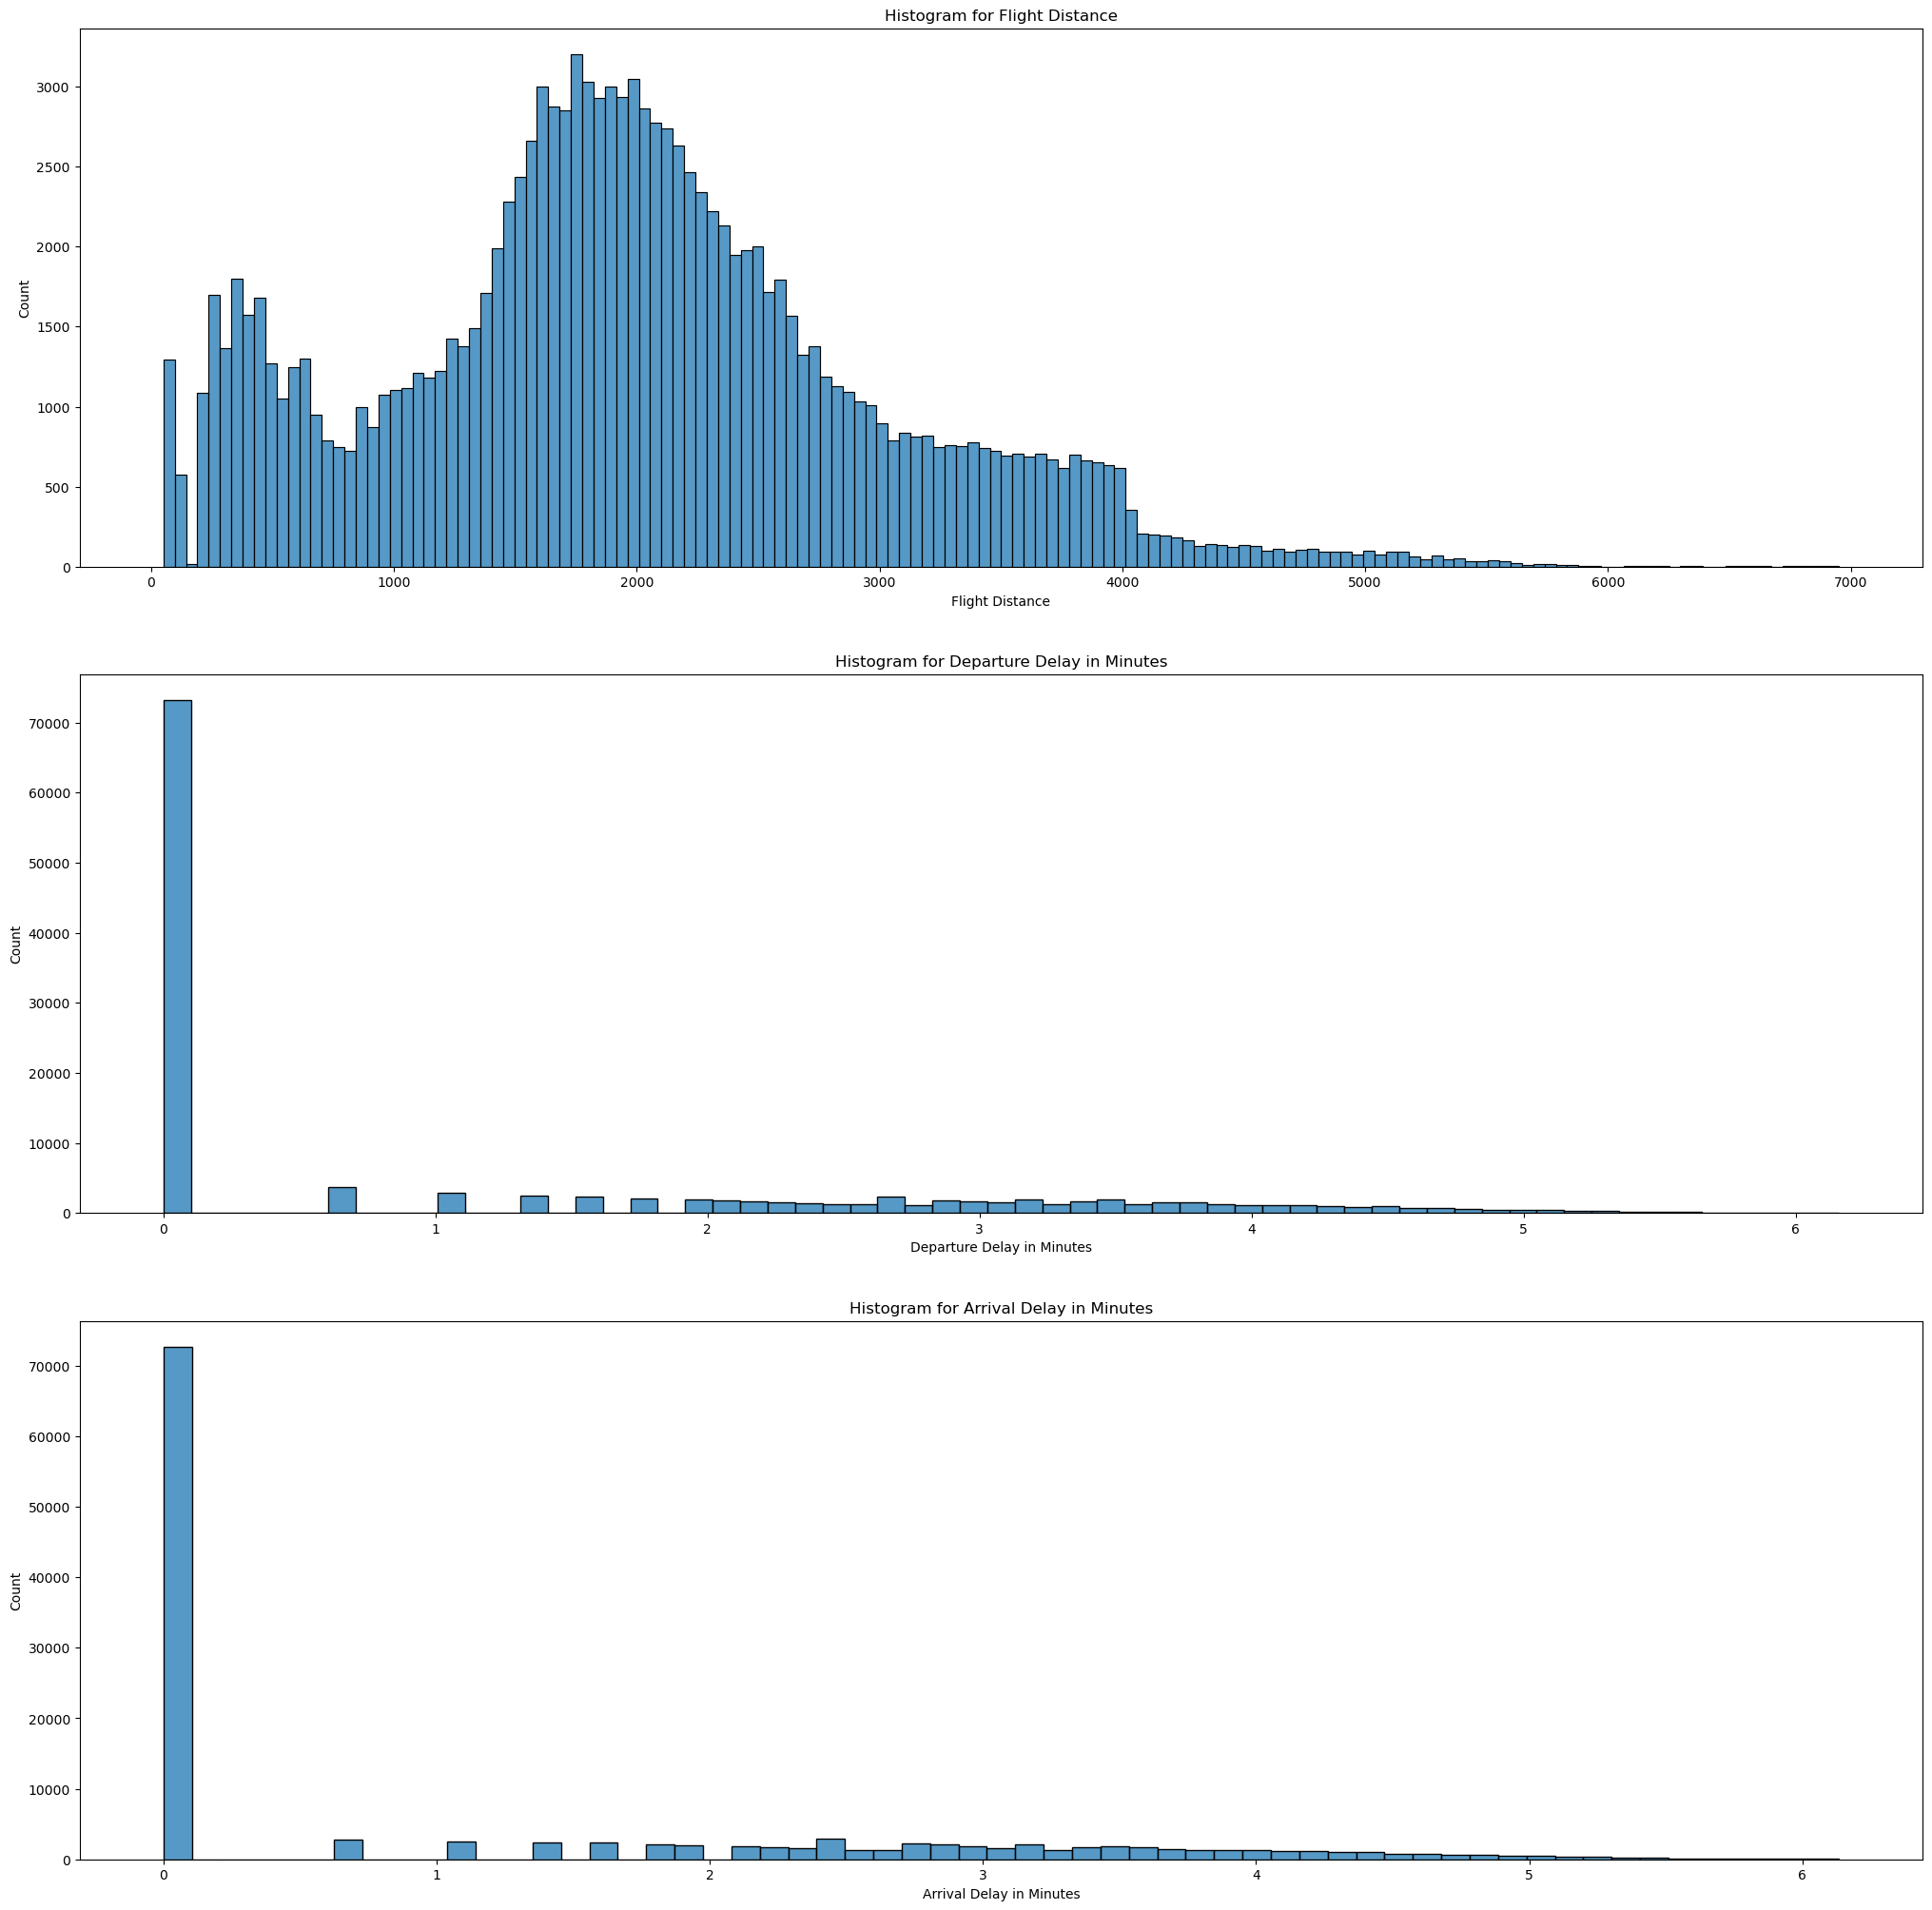

In [21]:
fig, ax = plt.subplots(nrows=len(numerical_columns[1:]), ncols=1, figsize=(25, 25))

for i, column_name in enumerate(numerical_columns[1:]):
    sns.histplot(data2[column_name],kde=False, ax=ax[i])
    ax[i].set_ylabel('Count')
    ax[i].set_title(f'Histogram for {column_name}')

In [22]:
data2.shape, data.shape , data2.shape[0] - data.shape[0]

((129431, 22), (129487, 22), -56)

The process of removing outliers removed only 56 rows.

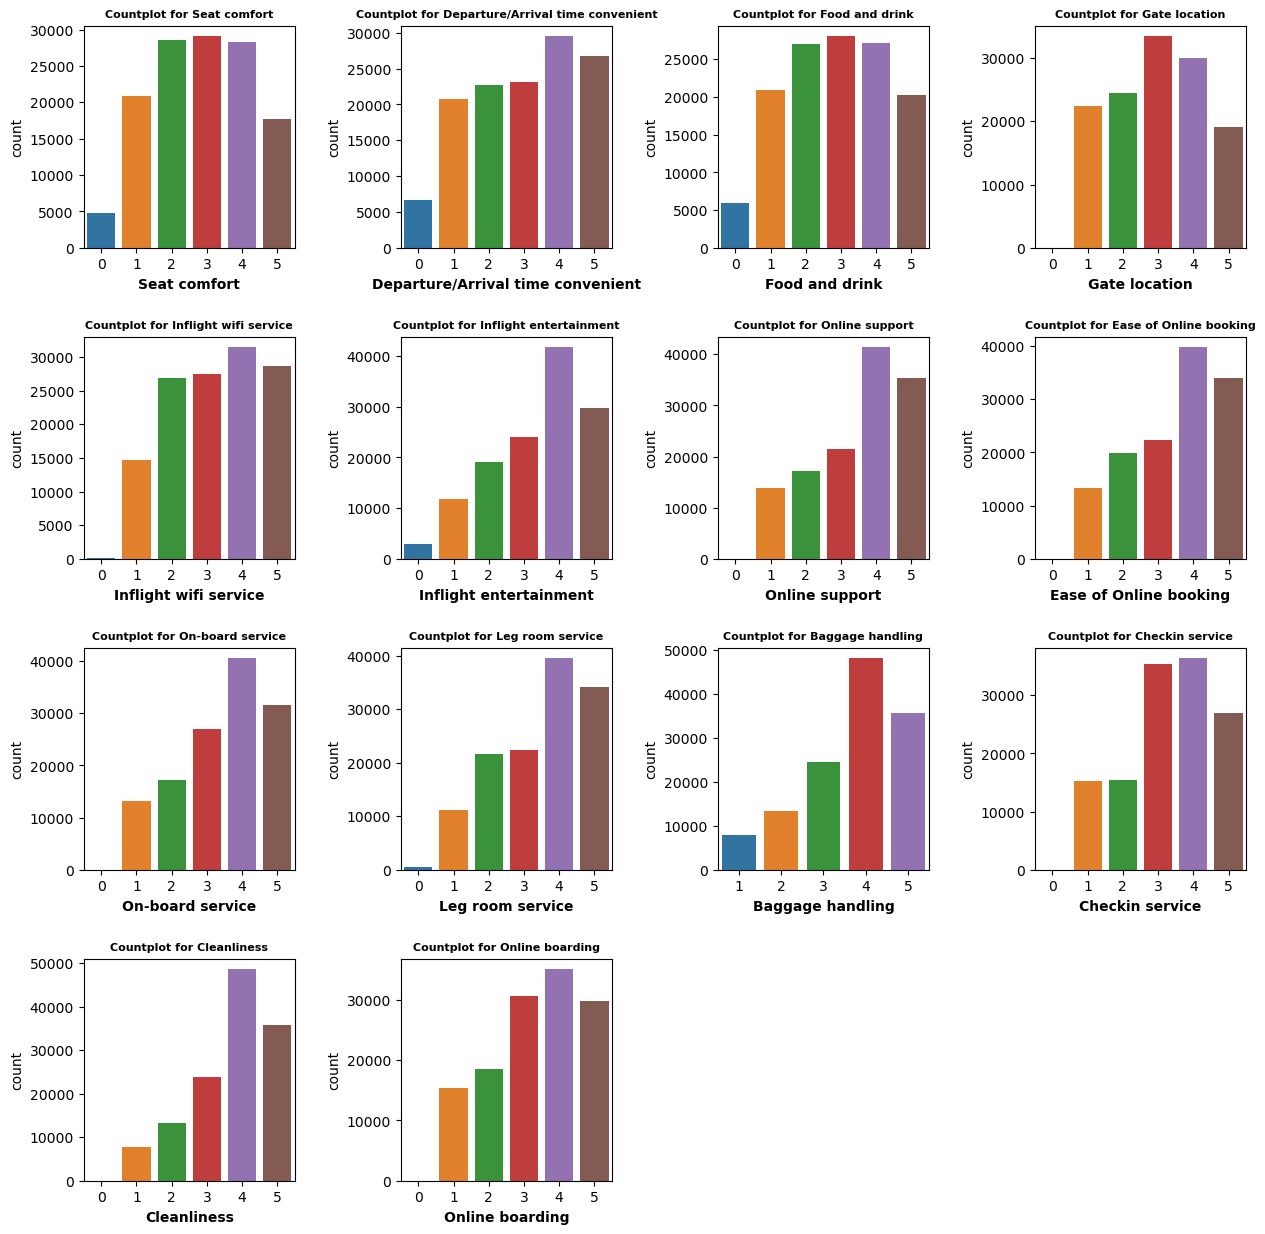

In [23]:
fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(15,15))

for i, column_name in enumerate(binary_columns):
    graph = sns.countplot(data=data2, x=column_name,ax=ax[i//4][i%4])
    graph.set_xlabel(column_name, fontweight='bold')
    graph.set_title(f'Countplot for {column_name}', fontweight='bold',fontsize=8)
    
plt.subplots_adjust(hspace=.4,wspace=.5)

for i in range(len(binary_columns), len(ax.flat)):
    ax.flat[i].set_visible(False)

These countplots display that most of the ratings were fairly high. Most of the ratings range from 3-5, indicating that most passengers likely had a pleasant experience with each of the services that they were requested to rate.

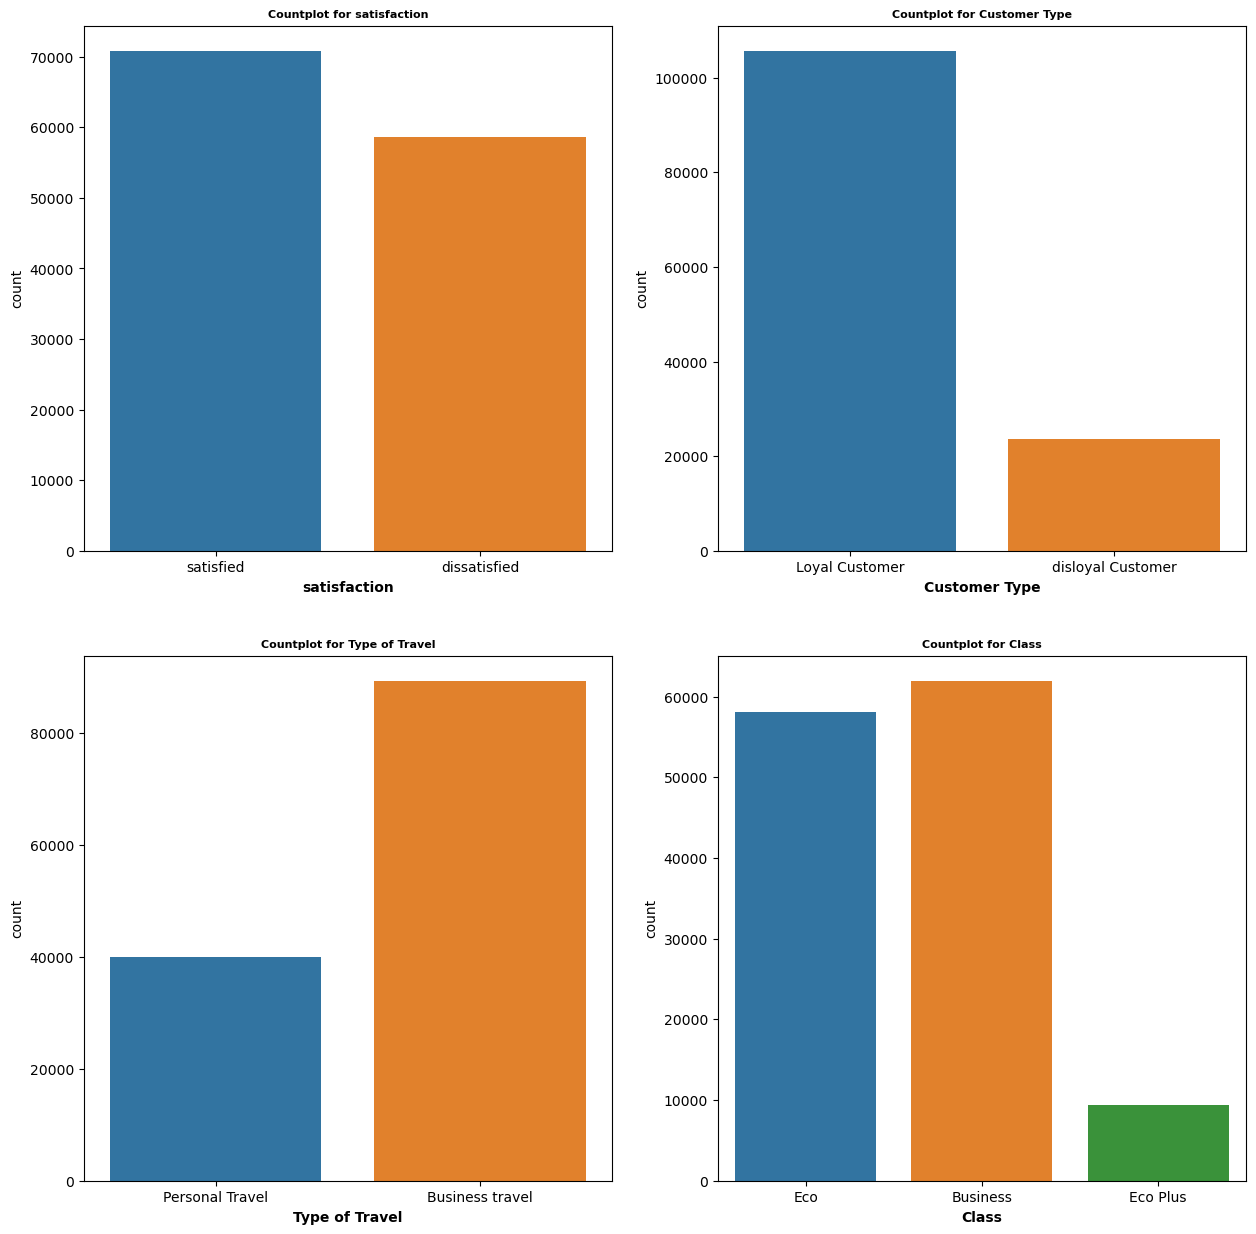

In [24]:
fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(15,15))

for i, column_name in enumerate(categorical_columns):
    graph = sns.countplot(data=data2, x=column_name,ax=ax[i//2][i%2])
    graph.set_xlabel(column_name, fontweight='bold')
    graph.set_title(f'Countplot for {column_name}', fontweight='bold',fontsize=8)

In the dataset, there is an undeven distribution of satisfied and dissatisfied customers. There are more satisfied passengers than dissatisfied customers. Furthermore, most of the customers are loyal customers and traveled for business reasons.

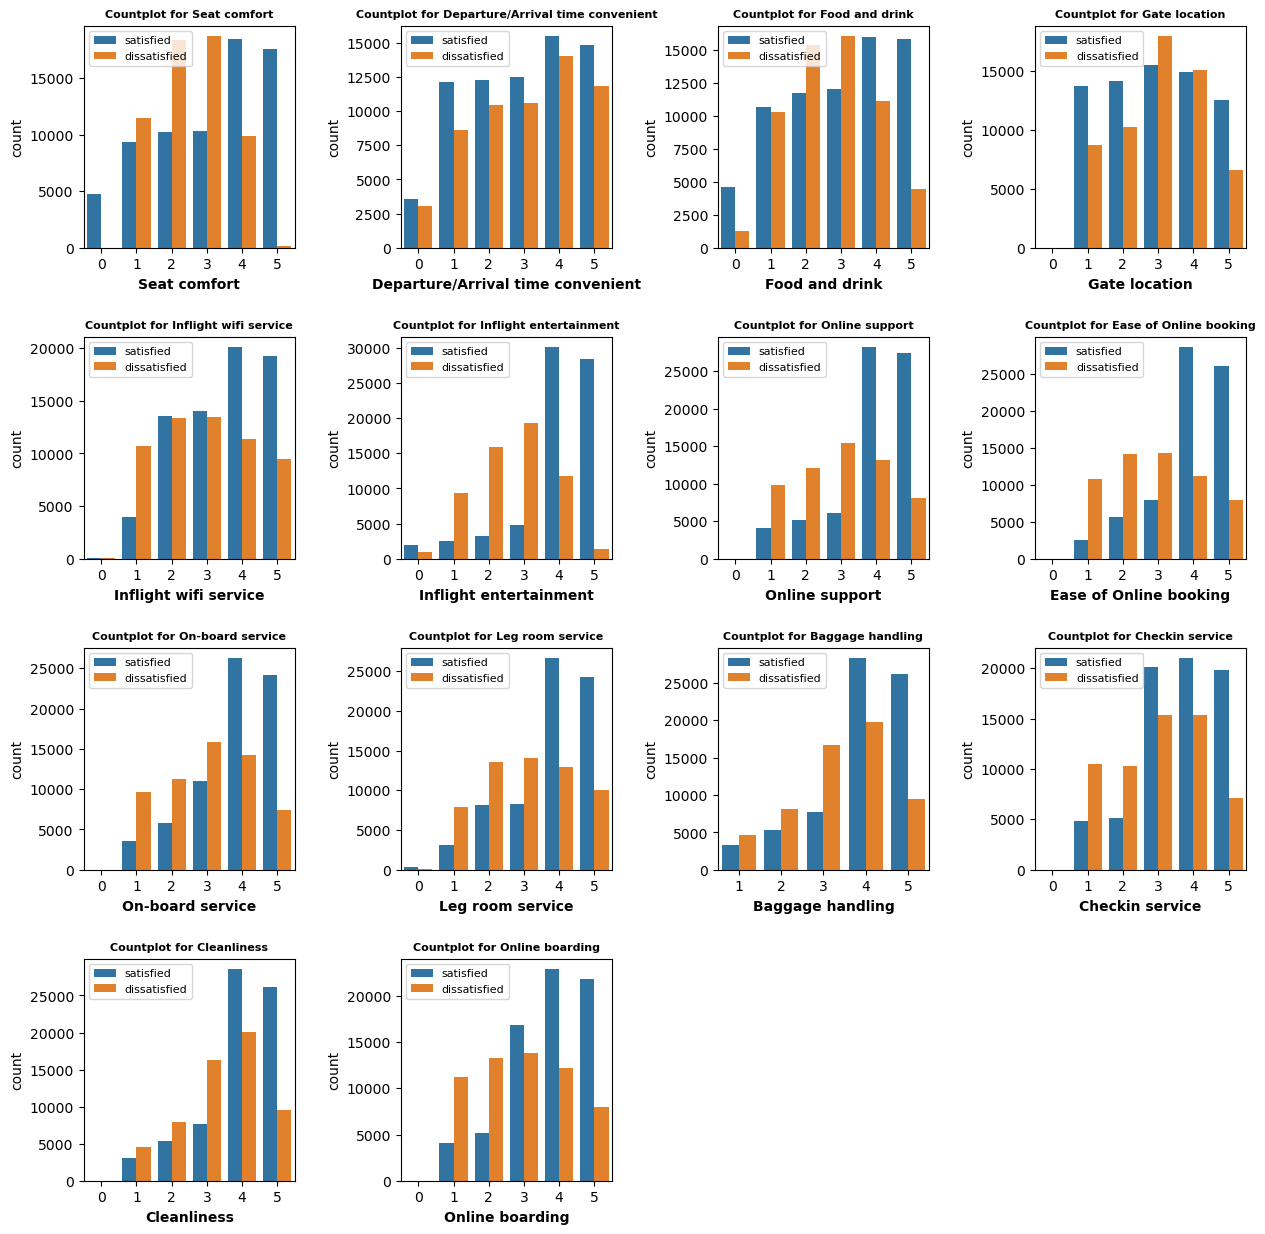

In [25]:
fig, ax = plt.subplots(nrows=4, ncols=4,figsize=(15,15))

for i, column_name in enumerate(binary_columns):
    graph = sns.countplot(data=data2, x=column_name,ax=ax[i//4][i%4],hue='satisfaction')
    graph.set_xlabel(column_name, fontweight='bold')
    graph.set_title(f'Countplot for {column_name}', fontweight='bold',fontsize=8)
    legend = graph.legend(fontsize=8)
    
plt.subplots_adjust(hspace=.4,wspace=.5)

for i in range(len(binary_columns), len(ax.flat)):
    ax.flat[i].set_visible(False)

**Note:**

The distribution of ratings for most of the categories is relatively similar. However, the most apparent differences in ratings between satisfied and dissatisfied passengers is in seat comfort, inflight Wi-Fi service, and inflight entertainment. The dissastified guests seem to have lower scores for these categories.

In [26]:
average_ratings = data2.groupby(['satisfaction'])[binary_columns].mean().T
average_ratings_difference = average_ratings.copy()
average_ratings_difference['Rating Difference (Dissatisfied - Satisfied)'] = average_ratings_difference['dissatisfied'] - average_ratings_difference['satisfied']
average_ratings_difference.sort_values(by='Rating Difference (Dissatisfied - Satisfied)')

satisfaction                       dissatisfied  satisfied  \
Inflight entertainment                 2.609049   4.024259   
Ease of Online booking                 2.851750   3.985196   
Online support                         2.959945   3.982981   
On-board service                       2.972785   3.872440   
Online boarding                        2.869711   3.751626   
Leg room service                       3.052313   3.844597   
Seat comfort                           2.467492   3.145538   
Checkin service                        2.971965   3.645517   
Baggage handling                       3.364128   3.969348   
Inflight wifi service                  2.920488   3.521091   
Cleanliness                            3.377377   3.977816   
Food and drink                         2.660919   3.010330   
Gate location                          3.008247   2.975868   
Departure/Arrival time convenient      3.016374   2.968699   

satisfaction                       Rating Difference (Dissatisfied - Satisfied)  
Inflight entertainment                                                -1.415210  
Ease of Online booking                                                -1.133446  
Online support                                                        -1.023035  
On-board service                                                      -0.899656  
Online boarding                                                       -0.881915  
Leg room service                                                      -0.792284  
Seat comfort                                                          -0.678047  
Checkin service                                                       -0.673552  
Baggage handling                                                      -0.605220  
Inflight wifi service                                                 -0.600602  
Cleanliness                                                           -0.600438  
Food and drink                                                        -0.349412  
Gate location                                                          0.032378  
Departure/Arrival time convenient                                      0.047674

In [40]:
fig = go.Figure()

for category in average_ratings.columns:
    fig.add_trace(go.Scatterpolar(
        r=average_ratings[category].tolist() + [average_ratings[category].iloc[0]],
        theta=binary_columns + [binary_columns[0]],
        text=average_ratings[category].round(2).astype(str).tolist() + [average_ratings[category].iloc[0].round(2).astype(str)],
        fill='toself',
        name=category
    ))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=False
        ),
    ),
    showlegend=True
)

fig.show()

**Note:**

 - The biggest differences in ratings between dissastified and satisfied customers is in inflight entertainment, ease of online booking, and online support.
 - Dissatisfied passengers have much lower ratings for these categories.
<br>

 - The least differences in ratings between dissastified and satisfied customers is in food and drink, gate location, and departure/arrival time convenience.
 - This means that all passengers have similar experiences within these aspects of flying.

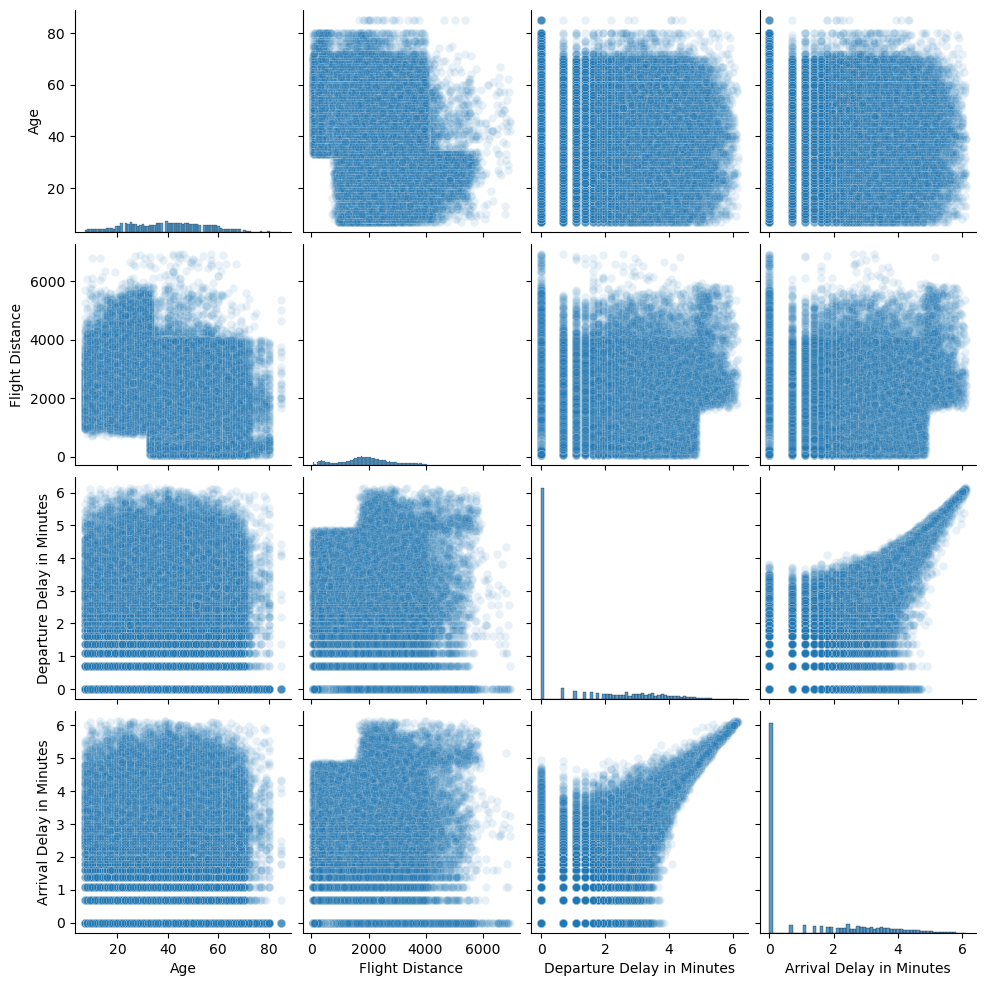

In [28]:
sns.pairplot(data2[numerical_columns],plot_kws={'alpha': 0.1});

When comparing numerical features, the only clear relationships are between departure and arrival delays in minutes. The other relationships are likely random and do not have any impact on each other.

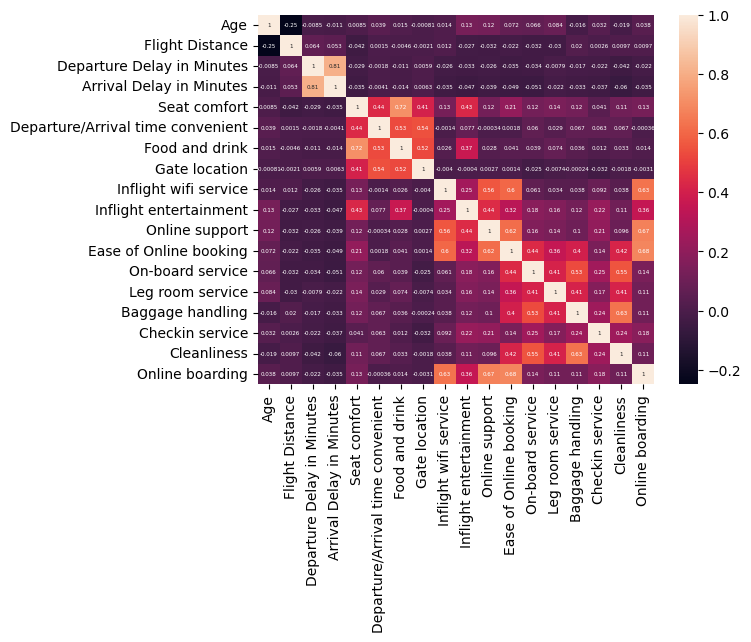

In [29]:
sns.heatmap(data2[numerical_columns+binary_columns].corr(),annot=True, annot_kws={"size": 4});

## One Hot Encoding

One hot encoding will encode the categorical columns through binary numbers to indicate which unique value corresponds to each categorical feature. This will be done through a series of 0s and 1s with different combinations to represent a unique value.

In [30]:
data3 = data2.copy()
data3 = pd.get_dummies(data3,columns=categorical_columns,drop_first=True)
data3.head()

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   65              265             0                                  0   
1   47             2464             0                                  0   
2   15             2138             0                                  0   
3   60              623             0                                  0   
4   70              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  ...  \
0                       4               2                       3  ...   
1                       2               2                       3  ...   
2                       0               2                       2  ...   
3                       4               3                       1  ...   
4                       3               4                       2  ...   

   Checkin service  Cleanliness  Online boarding  Departure Delay in Minutes  \
0                5            3                2                    0.000000   
1                2            3                2                    5.739793   
2                4            4                2                    0.000000   
3                4            1                3                    0.000000   
4                4            2                5                    0.000000   

   Arrival Delay in Minutes  satisfaction_satisfied  \
0                  0.000000                    True   
1                  5.723585                    True   
2                  0.000000                    True   
3                  0.000000                    True   
4                  0.000000                    True   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                            False                            True       True   
1                            False                            True      False   
2                            False                            True       True   
3                            False                            True       True   
4                            False                            True       True   

   Class_Eco Plus  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 23 columns]

In [31]:
data3.shape

(129431, 23)

# Splitting the Data

The data will be split into a training and test set. The training set is what the machine learning algorithms will use to understand the data and its effect on predicting whether or not the passengers will be satisfied. The test set will then be utilized to test the ability of the machine learning algorithms to predict results.

In [32]:
X = data3.drop('satisfaction_satisfied',axis=1)
y = data3['satisfaction_satisfied']
X.shape , y.shape

((129431, 22), (129431,))

In [33]:
X.head()

Age  Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0   65              265             0                                  0   
1   47             2464             0                                  0   
2   15             2138             0                                  0   
3   60              623             0                                  0   
4   70              354             0                                  0   

   Food and drink  Gate location  Inflight wifi service  \
0               0              2                      2   
1               0              3                      0   
2               0              3                      2   
3               0              3                      3   
4               0              3                      4   

   Inflight entertainment  Online support  Ease of Online booking  ...  \
0                       4               2                       3  ...   
1                       2               2                       3  ...   
2                       0               2                       2  ...   
3                       4               3                       1  ...   
4                       3               4                       2  ...   

   Baggage handling  Checkin service  Cleanliness  Online boarding  \
0                 3                5            3                2   
1                 4                2            3                2   
2                 4                4            4                2   
3                 1                4            1                3   
4                 2                4            2                5   

   Departure Delay in Minutes  Arrival Delay in Minutes  \
0                    0.000000                  0.000000   
1                    5.739793                  5.723585   
2                    0.000000                  0.000000   
3                    0.000000                  0.000000   
4                    0.000000                  0.000000   

   Customer Type_disloyal Customer  Type of Travel_Personal Travel  Class_Eco  \
0                            False                            True       True   
1                            False                            True      False   
2                            False                            True       True   
3                            False                            True       True   
4                            False                            True       True   

   Class_Eco Plus  
0           False  
1           False  
2           False  
3           False  
4           False  

[5 rows x 22 columns]

In [34]:
y.head()

0    True
1    True
2    True
3    True
4    True
Name: satisfaction_satisfied, dtype: bool

In [35]:
y.value_counts()

satisfaction_satisfied
True     70861
False    58570
Name: count, dtype: int64

In [36]:
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=.2)

# Modeling

Many different models will be used for this classification problem.

Models will be scored by the following features:

**Accuracy:**
- Measures the correctness of the model
- Represents the ratio of correctly predicted values to the total values
- Formula: (True Positives + True Negatives) / (True Positives + True Negatives + False Positives + False Negatives)

**Precision (Positive Predictive Value):**
- Measures the accuracy of positive predictions
- Represents the ratio of correctly predicted positive values to the total predicted positive values
- Formula: True Positives / (True Positives + False Positives)

**Recall (Sensitivity, True Positive Rate):**
- Measures the ability of the model to capture all the positive instances
- Represents the ratio of correctly predicted positive values to the total actual positive values
- Formula: True Positives / (True Positives + False Negatives)

**F1 Score:**
- Indicates the mean of precision and recall
- Measures a balance between precision and recall, which is useful for determining model ability when there are uneven class amounts
- Formula: 2 * (Precision * Recall) / (Precision + Recall)

Accuracy is not the best measure of model performance because class imbalance could lead to a high accuracy, due the the model simply constantly predicting the larger class. High scores in precision, recall, and F1 are the true indicators that the model is performing well

In [37]:
results = []

models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    KNeighborsClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    XGBClassifier()
]

pipelines = []

for model in models:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('model', model)
    ])
    pipelines.append(pipeline)
    
    
for model, pipeline in zip(models, pipelines):
    pipeline.fit(X_train, y_train)
    
    train_preds = pipeline.predict(X_train)
    test_preds = pipeline.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, train_preds)
    test_accuracy = accuracy_score(y_test, test_preds)
    
    model_name = type(model).__name__
    precision = precision_score(y_test, test_preds)
    recall = recall_score(y_test, test_preds)
    f1 = f1_score(y_test, test_preds)
    
    results.append({
        'Model': model_name,
        'Training Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })

results_df = pd.DataFrame(results)

KeyboardInterrupt: 

In [ ]:
results_df

In [ ]:
results_df['Mean of Precision, Recall, and F1'] = results_df[['Precision', 'Test Accuracy', 'F1 Score']].mean(axis=1)
results_df

In [ ]:
results_df.sort_values(by='Mean of Precision, Recall, and F1',ascending=False)

**Note:**

Looking at the dataframe, a high performing model for our dataset is the XGBClassifier. We will choose this model for hyperparameter tuning to try and achieve a better model performance. The other models can be tuned, but we will only look at the XGB model for now.

# Hyperparameter Tuning

Some parameters for the model will be tuned in order to find the best possible combination of parameters that would help the model achieve a better performance.

In [40]:
xgb = pipelines[-1]
xgb

Pipeline(steps=[('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

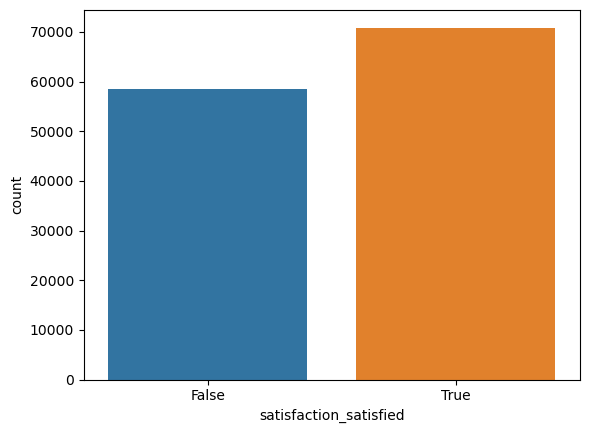

In [41]:
sns.countplot(x='satisfaction_satisfied',data=data3);

In [42]:
data3.groupby('satisfaction_satisfied').count()['Age']

satisfaction_satisfied
False    58570
True     70861
Name: Age, dtype: int64

**Note:**

Because there is an uneven distribution of satisfied and dissatisfied passengers, the F1 score will be the best measure of model performance. We will use the F1 score when gridsearching to find the best parameters for the model.

## Grid Search

Grid searching will give the model some parameters to function with in order to perform better. Finding the best parameters takes a large computational load, so we will only test a couple parameters and see the best results between those parameters.

In [43]:
param_grid = {
    'model__learning_rate': [0.1, 0.2],
    'model__n_estimators': [10,20],
    'model__max_depth': [4, 5],
    'model__min_child_weight': [2, 3],
    'model__subsample': [0.8, 0.9],
    'model__reg_alpha': [0, 0.1, 0.5]
}

grid_search = GridSearchCV(xgb, param_grid,scoring='f1',cv=5)

grid_search.fit(X_train,y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'model__learning_rate': 0.2, 'model__max_depth': 5, 'model__min_child_weight': 3, 'model__n_estimators': 20, 'model__reg_alpha': 0, 'model__subsample': 0.9}


In [44]:
best_xgb = grid_search.best_estimator_

print('With Hyperparameter Tuning:')
print('Training Accuracy:',best_xgb.score(X_train,y_train))
print('Test Accuracy:',best_xgb.score(X_test,y_test))
print('Precision:', precision_score(y_test,best_xgb.predict(X_test)))
print('Recall:',recall_score(y_test,best_xgb.predict(X_test)))
print('F1:', f1_score(y_test,best_xgb.predict(X_test)))
print()
print('Without Hyperparameter Tuning:')
print('Training Accuracy:',accuracy_score(y_train, xgb.predict(X_train)))
print('Test Accuracy:',accuracy_score(y_test, xgb.predict(X_test)))
print('Precision:', precision_score(y_test,xgb.predict(X_test)))
print('Recall:', recall_score(y_test,xgb.predict(X_test)))
print('F1:', f1_score(y_test,xgb.predict(X_test)))

With Hyperparameter Tuning:
Training Accuracy: 0.9276442864869041
Test Accuracy: 0.9279947463978059
Precision: 0.9357446808510639
Recall: 0.9323063877897118
F1: 0.9340223700976923

Without Hyperparameter Tuning:
Training Accuracy: 0.9687475855674882
Test Accuracy: 0.9564260053308611
Precision: 0.9670109007458405
Recall: 0.9527981910684002
F1: 0.9598519362186788


**Note:**

In this situation, hyperparameter tuning ended up worsening the performance of the model. This could be due to several reasons. For example, the tuned model could be overfitting and the best possible parameters were not tested out. These problems could be explored in the future to test the maximum capacity of the model to predict satisfaction in this situation.

# Conclusion

## Results

The best model found to classify the satisfaction of the passengers was an XGB Classification model. The highest performance of the model documented was about 96% correctness. 

## Areas for Exploration

1. Feature engineering could have been performed on the dataset to create features that would have a greater impact in determining the satisfaction of the passengers. This would, in turn, increase the performance of the model.
<br>

2. Other classification models could have been used on the data to predict passenger satisfaction. Only a handful of models were used in this dataset and there are many other models that can be used to find a better functioning model.
<br>

3. Using a better computer that could handle a higher computational load, the parameters for the grid search used could be more expansive, which would lead to finding the most optimal parameters for the model to function. The model's performance could potentially increase by multiple percentages after doing this.

## Model Application

This model could be used in the real world by airlines to determine which passengers would not be pleased by their experience with the airline. These passengers could be catered to in order to enhance their experience and lead to a higher overall satisfaction rate. Furthermore, these passengers could be asked about what the airline could do in order to be more pleasurable to ultimately upgrade the airline.

Having a high passenger satisfaction rate would benefit the airline because customer loyalty would increase and brand name would positively be affected, leading to higher revenues for the airline.